## import all the required libraries:

In [236]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## import the data file from local:

In [238]:
bike_data = pd.read_csv(r"C:\Users\User\Downloads\day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## understanding the structure of data:

#### Checking shape of the dataset:

In [239]:
bike_data.shape

(730, 16)

#### Observing Statistical Parameters of Data:

In [240]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## data quality check and dealing with missing value:
#### check the percentage of missing values:

In [241]:
bike_data.info() ## only object type variable is dteday

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [242]:
bike_data.isnull().sum() ## no null values at all

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## removing some variables as they are not very useful in case of our model building:
2. removing vaiable 'instant' as it is like an id for each entry
3. removing 'dteday' as information of this variable can be explained by other variables like 'season'.'yr','mnth','holiday' and 'weekday'
4. removing 'atemp' as it is highly co related with 'temp' and only 'temp' is sufficeant to predict the relationship with the target variable (temp and atemp has same type of relationship with target variable)
5. removng 'casual' and 'registered' as they are also dependent variable and so they are not considered as inputs to our model in case of predicting the target variable 'cnt'

In [243]:
bike_data.drop(['instant','dteday','atemp','casual','registered'],axis=1,inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


## converting some numeric variables to categorical variables:
1. season : 1:spring, 2:summer, 3:fall, 4:winter
2. mnth : 1:jan, 2:feb, 3:march, 4:april, 5:may, 6:jun, 7:july, 8:aug, 9:sep, 10:oct, 11:nov, 12:dec
3. weekday : day of the week
4. weathersit : 1:Clear, 2:Mist + Cloudy, 3:Light Snow, 4:Heavy Rain

In [244]:
def map_season(x):
    if x == 1:
        return('spring')
    elif x == 2:
        return('summer')
    elif x == 3:
        return('fall')
    elif x == 4:
        return('winter')
def map_month(x):
    if x == 1:
        return('jan')
    elif x == 2:
        return('feb')
    elif x == 3:
        return('march')
    elif x == 4:
        return('april')
    elif x == 5:
        return('may')
    elif x == 6:
        return('jun')
    elif x == 7:
        return('july')
    elif x == 8:
        return('aug')
    elif x == 9:
        return('sep')
    elif x == 10:
        return('oct')
    elif x == 11:
        return('nov')
    elif x == 12:
        return('dec')
def map_day(x):
    if x == 0:
        return('sunday')
    elif x == 1:
        return('monday')
    elif x == 2:
        return('tuesday')
    elif x == 3:
        return('wednesday')
    elif x == 4:
        return('thursday')
    elif x == 5:
        return('friday')
    elif x == 6:
        return('saturday')   
def map_weather(x):
    if x == 1:
        return('Clear')
    elif x == 2:
        return('Mist Cloudy')
    elif x == 3:
        return('Light Snow')
    elif x == 4:
        return('Heavy Rain')   

bike_data['season'] = bike_data['season'].apply(lambda x:map_season(x))
bike_data['mnth'] = bike_data['mnth'].apply(lambda x:map_month(x))
bike_data['weekday'] = bike_data['weekday'].apply(lambda x:map_day(x))
bike_data['weathersit'] = bike_data['weathersit'].apply(lambda x:map_weather(x))

In [245]:
bike_data.head() ## check data after converting the variables

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,Mist Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,Mist Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,Clear,9.305237,43.6957,12.522300,1600


## visualising the data:


1. traget variable with month:

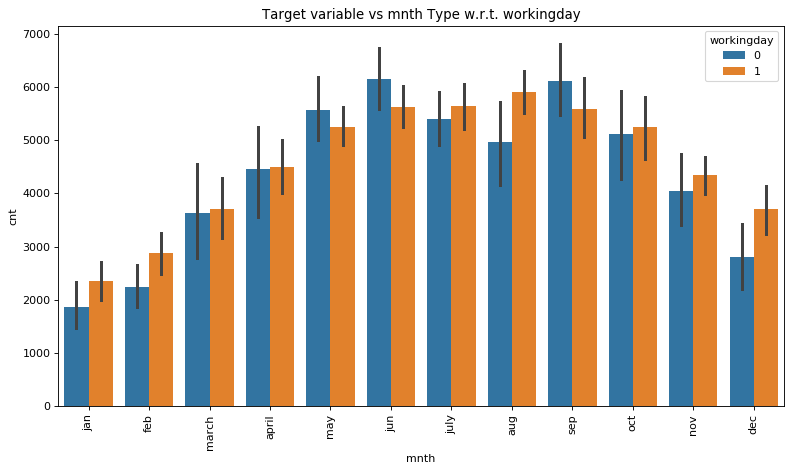

In [246]:
plt.figure(figsize=(10,6), dpi=80)
sns.barplot(x='mnth', y='cnt',data=bike_data, hue='workingday')
plt.title("Target variable vs mnth Type w.r.t. workingday")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

1.there is a hike on numbers of bike rent on months of jun to september


2.maximum months number of bikes rent are higher on weekdays rather than weekends

2. target variable with season:

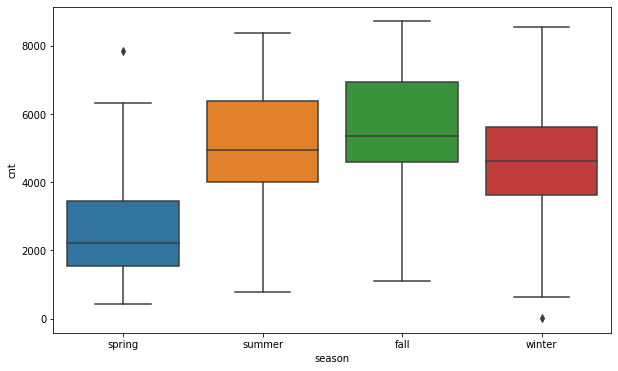

In [247]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'season', y = 'cnt',  data = bike_data)
plt.show()

there is a hike in bike rental on fall

3. target variable with weather type:

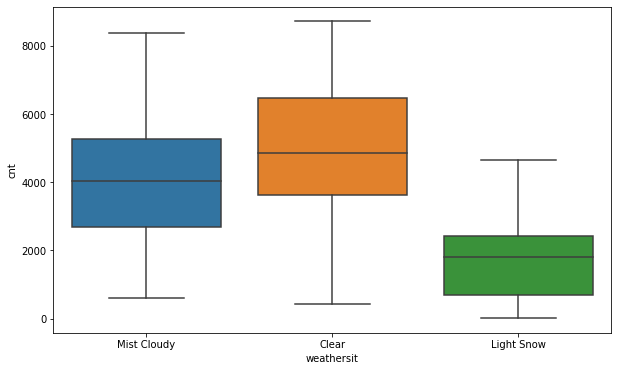

In [248]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'weathersit', y = 'cnt',  data = bike_data)
plt.show()

clear weather is profitable for bike rental

4. target variable with month with respect to holidays:

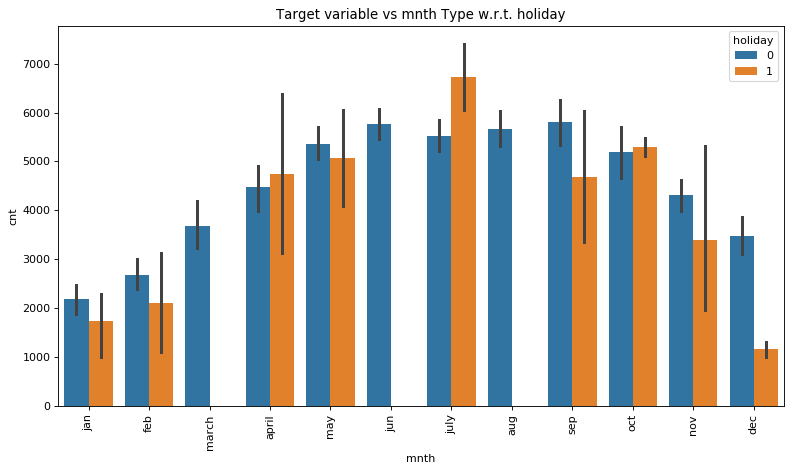

In [249]:
plt.figure(figsize=(10,6), dpi=80)
sns.barplot(x='mnth', y='cnt',data=bike_data, hue='holiday')
plt.title("Target variable vs mnth Type w.r.t. holiday")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

there is a significant rise on bike rental in holidays on the month of july

5. distribution of numerical variables:

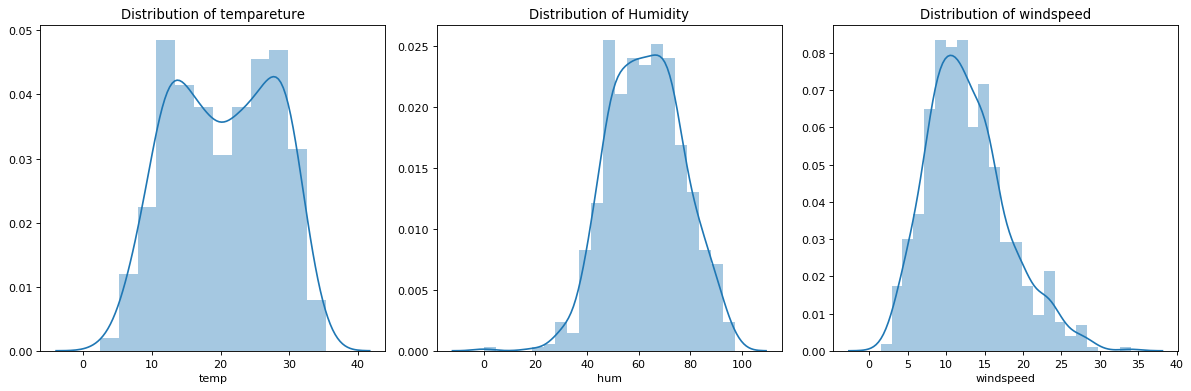

In [250]:
plt.figure(figsize=(15,5), dpi=80)
plt.subplot(1,3,1)
sns.distplot(bike_data['temp'])
plt.title("Distribution of tempareture")

plt.subplot(1,3,2)
ax = sns.distplot(bike_data['hum'])
#ax.set_yscale('log')
plt.title("Distribution of Humidity")

plt.subplot(1,3,3)
sns.distplot(bike_data['windspeed'])
plt.title("Distribution of windspeed")
plt.tight_layout()
plt.show()

## Treating Outliers:


#### We can use below methods to treat outliers:

1. Removal
2. Replacing
3. Flooring
4. Capping

checking for outliers:

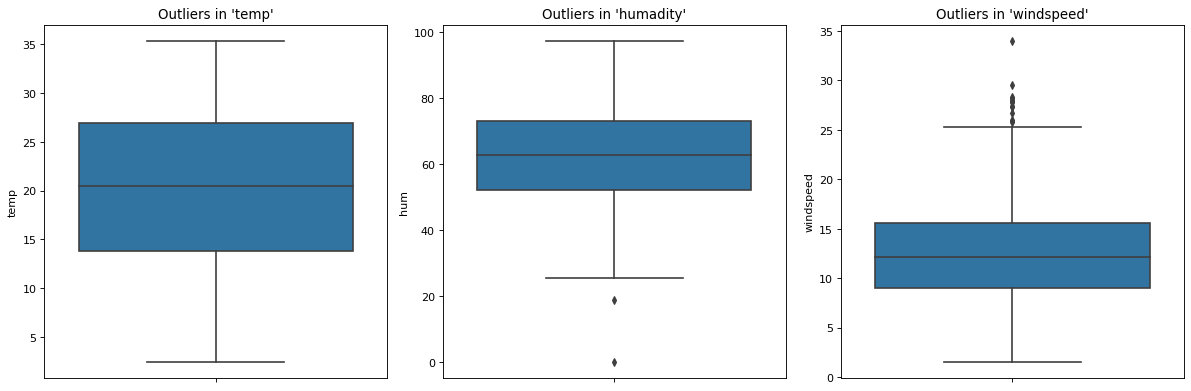

In [251]:
plt.figure(figsize=(15,5), dpi=80)
plt.subplot(1,3,1)
sns.boxplot(y=bike_data['temp'])
plt.title("Outliers in 'temp'")

plt.subplot(1,3,2)
ax = sns.boxplot(y=bike_data['hum'])
#ax.set_yscale('log')
plt.title("Outliers in 'humadity'")

plt.subplot(1,3,3)
sns.boxplot(y=bike_data['windspeed'])
plt.title("Outliers in 'windspeed'")
plt.tight_layout()
plt.show()

there is no such outliers in any variable hence leave them as it is

## data preparation:

#### dummy variables:

1.season variable has four layers hence converting them into int 

In [252]:
## dropping first column as season can be explained by three columns easily
status_season = pd.get_dummies(bike_data['season'],drop_first=True)

In [253]:
## checking head of status
status_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [254]:
## concatenate status_season with bike_data
bike_data = pd.concat([bike_data,status_season],axis=1)

In [255]:
## checking head
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,jan,0,saturday,0,Mist Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,jan,0,sunday,0,Mist Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,jan,0,monday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,jan,0,tuesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,jan,0,wednesday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [256]:
## removing season from bike_data as it is already explained by status_season
bike_data.drop(['season'],axis=1,inplace=True)
bike_data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,saturday,0,Mist Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,0,jan,0,sunday,0,Mist Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,0,jan,0,monday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,jan,0,tuesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,jan,0,wednesday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


2.month variable has twelve layers converting them to int

In [257]:
## dropping first column from status_mnth as mnth can be explained by eleven columns easily
status_mnth = pd.get_dummies(bike_data['mnth'],drop_first=True)


In [258]:
## checking head of status_mnth
status_mnth.head()

,aug,dec,feb,jan,july,jun,march,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [259]:
## concat status_mnth with bike_data
bike_data = pd.concat([bike_data,status_mnth],axis=1)

In [260]:
## checking head
bike_data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,dec,feb,jan,july,jun,march,may,nov,oct,sep
0,0,jan,0,saturday,0,Mist Cloudy,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,jan,0,sunday,0,Mist Cloudy,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,jan,0,monday,1,Clear,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,jan,0,tuesday,1,Clear,8.200000,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,jan,0,wednesday,1,Clear,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [261]:
## removing mnth as it is already explained by status_mnth
bike_data.drop(['mnth'],axis=1,inplace=True)
bike_data.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,dec,feb,jan,july,jun,march,may,nov,oct,sep
0,0,0,saturday,0,Mist Cloudy,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sunday,0,Mist Cloudy,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,monday,1,Clear,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tuesday,1,Clear,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wednesday,1,Clear,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


3. weekday variable has seven layers

In [262]:
## dropping first column as weekday can be explained by six columns
status_weekday = pd.get_dummies(bike_data['weekday'],drop_first=True)
status_weekday.head() ## checking head

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [263]:
## concat status_weekday and bike_data
bike_data = pd.concat([bike_data,status_weekday],axis=1)
## checking head
bike_data.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,saturday,0,Mist Cloudy,14.110847,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,sunday,0,Mist Cloudy,14.902598,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,monday,1,Clear,8.050924,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,tuesday,1,Clear,8.200000,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,wednesday,1,Clear,9.305237,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


In [264]:
## removing weekday column and checking head
bike_data.drop(['weekday'],axis=1,inplace=True)
bike_data.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,0,Mist Cloudy,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,Mist Cloudy,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,Clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,Clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,Clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


4. weathersit has four layers but we have data for only three types

In [265]:
## create dummies and checking head of status_weathersit
status_weathersit = pd.get_dummies(bike_data['weathersit'],drop_first=True)
status_weathersit.head()

,Light Snow,Mist Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


there is no such value whose weathersit is heavy rain

In [266]:
## concat status_weathersit and checking head
bike_data = pd.concat([bike_data,status_weathersit],axis=1)
bike_data.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist Cloudy
0,0,0,0,Mist Cloudy,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,Mist Cloudy,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,Clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,Clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,Clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [267]:
## removing weathersit and checking head
bike_data.drop(['weathersit'],axis=1,inplace=True)
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## splitting the data into training and testing sets:

In [268]:
from sklearn.model_selection import train_test_split
## splitting the data 
np.random.seed(0)
df_train , df_test = train_test_split(bike_data,train_size=0.7,test_size=0.3,random_state=100)
# checking head of df_train
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist Cloudy
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [269]:
## checking shape of df_train
df_train.shape

(510, 29)

In [270]:
## checking shape of df_test
df_test.shape

(219, 29)

## rescaling the features
#### using minmax scaler from sklearn

In [271]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [272]:
## transforming the data of numerical variables using minmaxscaler approch
features = ['temp','hum','windspeed','cnt']
df_train[features] = scaler.fit_transform(df_train[features])
## checking head of df_train
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## checking the corelations between different variables:

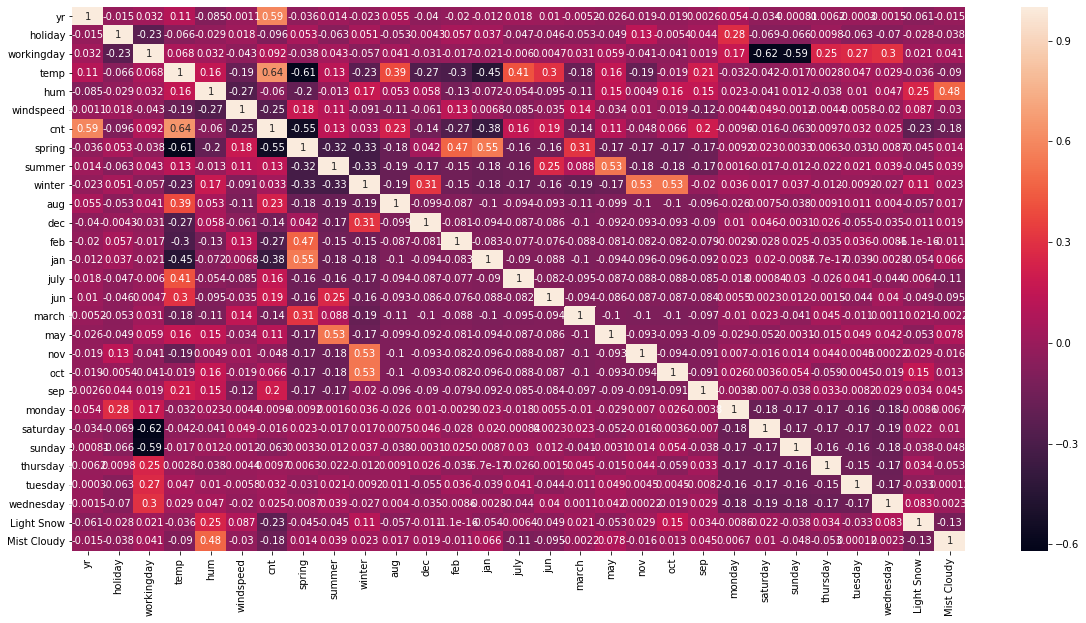

In [273]:
plt.figure(figsize = (20,10))        # Size of the figure

sns.heatmap(df_train.corr(),annot=True)
plt.show()

target variable has some good corelations with year and temp

## dividing train set into X and y sets for building model:

In [274]:
y_train = df_train.pop('cnt')
X_train = df_train

In [275]:
## checking shape of X_train
X_train.shape

(510, 28)

In [276]:
## checking shape of y_train
y_train.shape

(510,)

## using recursive feature elimination for selecting features for model:

In [277]:
## import libraries for rfe and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [278]:
## create model and run RFE
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [279]:
## running RFE
rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)

In [280]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('aug', False, 12),
 ('dec', False, 8),
 ('feb', False, 9),
 ('jan', False, 6),
 ('july', True, 1),
 ('jun', False, 18),
 ('march', False, 19),
 ('may', False, 10),
 ('nov', False, 7),
 ('oct', False, 15),
 ('sep', True, 1),
 ('monday', False, 13),
 ('saturday', False, 4),
 ('sunday', False, 11),
 ('thursday', False, 16),
 ('tuesday', False, 14),
 ('wednesday', False, 17),
 ('Light Snow', True, 1),
 ('Mist Cloudy', False, 2)]

## building stats model for our prediction:

In [281]:
## selecting features as per rfe
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'july',
       'sep', 'Light Snow'],
      dtype='object')

In [282]:
import statsmodels.api as sm
## importing statsmodel and add constant
X_train_rfe = sm.add_constant(X_train[col])
lm = sm.OLS(y_train,X_train_rfe).fit() ## training linear model on train data


In [283]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.53e-184
Time:                        21:27:54   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3769      0.031     12.133      0.0

## checking for multicolinearity of variables:

In [284]:
X_train_rfe = X_train_rfe.drop('const',axis=1)

In [285]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'july',
       'sep', 'Light Snow'],
      dtype='object')

In [286]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['vif'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by='vif',ascending=False)
#vif.drop(vif.index[0],inplace=True)
vif

,features,vif
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,spring,2.40
0,yr,2.06
6,winter,1.98
7,july,1.40
8,sep,1.20
9,Light Snow,1.11
1,holiday,1.04


hum as a very high vif hence dropping column hum

In [287]:
X_train1 = X_train[col]
X_train1.drop('hum',axis=1,inplace=True) ## drop column hum

In [288]:
X_train1_rfe = sm.add_constant(X_train1)
lm = sm.OLS(y_train,X_train1_rfe).fit() ## train data with again after drop the variable

In [289]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.33e-171
Time:                        21:27:56   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2042      0.025      8.095      0.0

In [290]:
X_train1_rfe = X_train1_rfe.drop('const',axis=1) ## removing const column 

In [291]:
X_train1_rfe.columns ## check columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter', 'july', 'sep',
       'Light Snow'],
      dtype='object')

In [292]:
vif = pd.DataFrame() ## check multicolinearity
vif['features'] = X_train1_rfe.columns
vif['vif'] = [variance_inflation_factor(X_train1_rfe.values,i) for i in range(X_train1_rfe.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by='vif',ascending=False)
#vif.drop(vif.index[0],inplace=True)
vif

,features,vif
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,spring,1.61
5,winter,1.37
6,july,1.34
7,sep,1.20
8,Light Snow,1.06
1,holiday,1.04


#### all nine predictor variable has vif less than 5
as there is no multi colinearity between predictor variables hence make  this our final model

## residual analysis of train data:

checking the distribution of error terms

In [293]:
X_train1_rfe_ra = sm.add_constant(X_train1_rfe)
y_train_pred = lm.predict(X_train1_rfe_ra)

Text(0.5, 0, 'Errors')

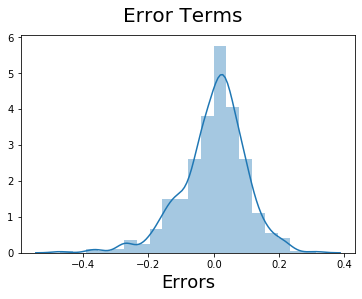

In [294]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

as we can see error terms are normally distributed

## making predictions:

perform scaling and dividing test set into and X_test and y_test

In [295]:
## checking df_test head
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist Cloudy
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [296]:
scale_var = ['temp','hum','windspeed','cnt']
df_test[scale_var] = scaler.transform(df_test[scale_var])

In [297]:
## checking head again
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [298]:
## dividing X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test[X_train1_rfe.columns]

predict test data

In [299]:
X_test_lm = sm.add_constant(X_test)
y_test_pred = lm.predict(X_test_lm)

In [300]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### looking at RMSE value

In [301]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.10015270333958813

#### check the r2 score of test data

In [302]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7888115946045292

#### check adjusted r2 score of test data

Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
n = sample size
p = number of predictors

In [303]:
adj_r2score = 1-(1-r_squared)*(df_test.shape[0]-1)/(df_test.shape[0]-9-1)
adj_r2score

0.7797173570516143

## model evalution:

Text(0, 0.5, 'y_pred')

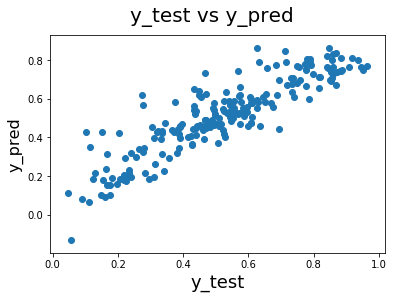

In [304]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## the equation of best fitted surface based on our final model:

cnt = 0.2042 + (0.2350*yr) - (0.0862*holiday) + (0.4758*temp) - (0.1325*windspeed) - (0.1032*spring) + (0.0504*winter) - (0.0616*july) + (0.0498*sep) - (0.2562Light snow)



## final report:

As per our final Model, the top predictor variables that influences the cnt are:

1. yr : A coefficient value of ‘0.2350’ indicated that a unit increase in yr variable, increases the cnt numbers by 0.2350 units.

2. holiday: A coefficient value of ‘0.0862’ indicated that a unit increase in holiday variable, decreases the cnt numbers by 0.0862 units.

3. temp: A coefficient value of ‘0.4758’ indicated that a unit increase in temp variable, increases the cnt numbers by 0.4758 units.

4. windspeed: A coefficient value of ‘0.1352’ indicated that a unit increase in windspeed variable, decreases the cnt numbers by 0.1352 units.

5. spring: A coefficient value of ‘0.1032’ indicated that a unit increase in spring variable, decreases the cnt numbers by 0.1032 units.

6. winter: A coefficient value of ‘0.0504’ indicated that a unit increase in winter variable, increases the cnt numbers by 0.0504 units.

7. july: A coefficient value of ‘0.0616’ indicated that a unit increase in july variable, decreases the cnt numbers by 0.0616 units.

8. sep: A coefficient value of ‘0.0498’ indicated that a unit increase in sep variable, increases the cnt numbers by 0.0498 units.

9. Light Snow: A coefficient value of ‘0.2562’ indicated that a unit increase in Light Snow variable, decreases the cnt numbers by 0.2562 units.

Hypothesis Testing states that H0:B1=B2=...=Bn=0 H1: at least one Bi!=0

From the final model summary, it is evident that all our coefficients are not equal to zero hence REJECT the NULL HYPOTHESIS

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 228.8
Prob (F-statistic): 5.33e-171
The F-Statistics value of 228.8 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant



## final result :

1. Train R^2 :0.805
2. Train Adjusted R^2 : 0.801
3. Test R^2 :0.788
4. Test Adjusted R^2 :0.779 